In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
from scipy.optimize import curve_fit

In [4]:
figsize(10, 8)

In [5]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p.T, hits.T, ra_bins, dec_bins

In [8]:
def get_map(bank='A', session='5', pixbeam=4.):
    dataf = np.load('/home/mabitbol/GBT-S140/datamaps/datamaps_'+bank+'_'+session+'.npz')
    tmask = dataf['tmask']
    ras = dataf['ras'][tmask]
    decs = dataf['decs'][tmask]
    calibrated = dataf['calibrated'][tmask]
    
    nrapix = int((ras.max() - ras.min()) / (pixbeam / 60.))
    ndecpix = int((decs.max() - decs.min()) / (pixbeam / 60.))
    
    datamap, hits, rabins, decbins = naive_map(calibrated, ras, decs, nrapix, ndecpix)
    mask = hits == 0
    signal = datamap / hits
    signal[mask] = np.nan
    
    figure()
    pc = pcolormesh(rabins, decbins, signal)
    clim(-0.1, 0.1)
    cb = colorbar()
    xlabel('RA [degrees]')
    ylabel('DEC [degrees]')
    cb.set_label('Flux [Jy]')
    return signal, hits, rabins, decbins

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide
/usr/lib64/python2.7/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


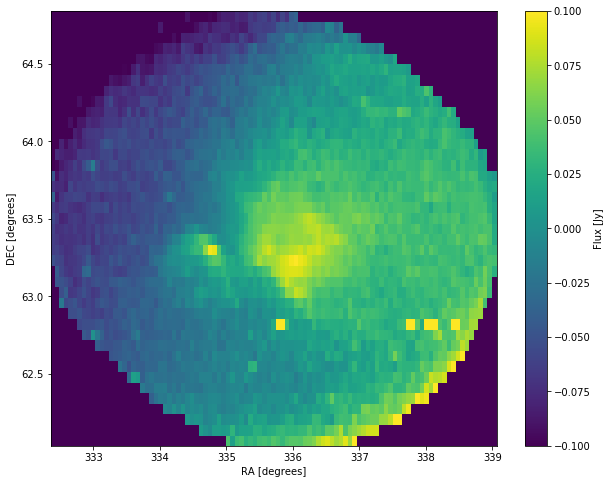

In [9]:
signalA, hitsA, rabins, decbins = get_map('A', '5')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide


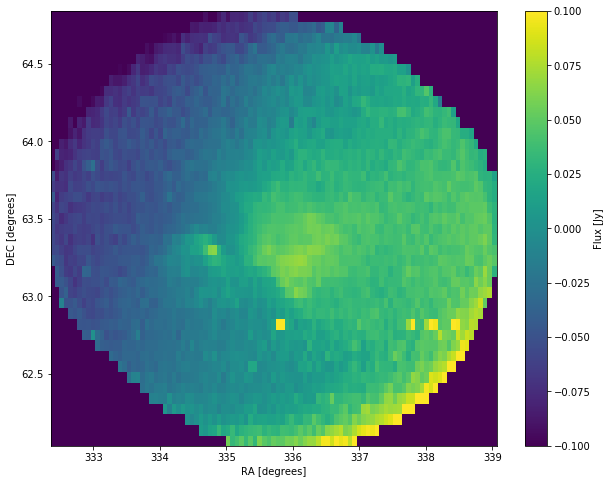

In [10]:
signalB, hitsB, rabins, decbins = get_map('B', '5')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide


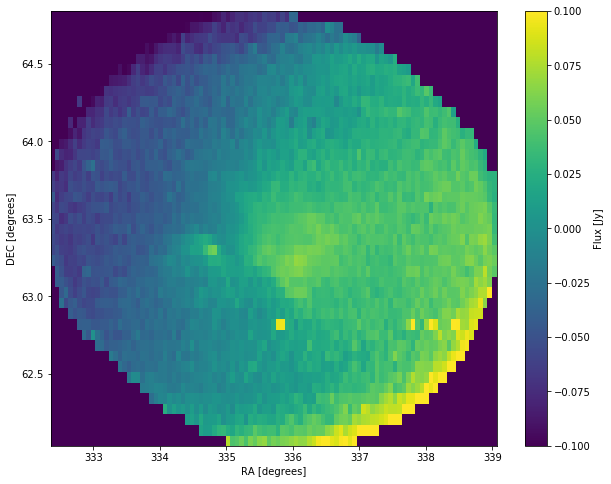

In [11]:
signalC, hitsC, rabins, decbins = get_map('C', '5')

In [12]:
N = size(signalA)

In [13]:
sigA = signalA.reshape(N, -1)
sigB = signalB.reshape(N, -1)
sigC = signalC.reshape(N, -1)

In [14]:
def line(x, m, b):
    return m * x + b

In [15]:
maskA = ~np.isnan(sigA)
maskB = ~np.isnan(sigB)
mask = maskA * maskB
popt = curve_fit(line, sigA[mask], sigB[mask])
popt[0]

array([ 0.932838  ,  0.00148711])

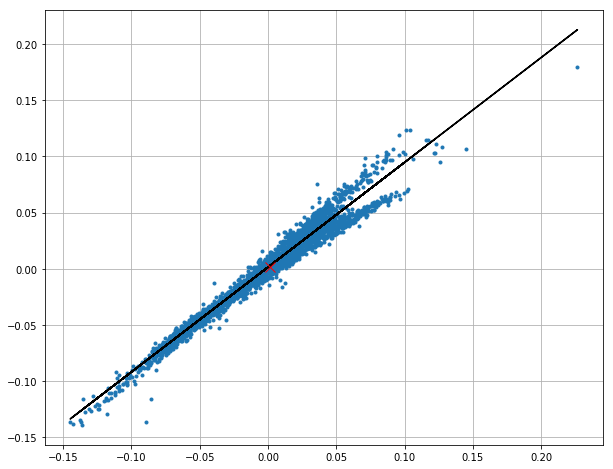

In [16]:
plot(sigA, sigB, '.')
#plot(sigA, line(sigA, 1., 0), 'g')
plot(sigA, line(sigA, *popt[0]), 'k')
plot(popt[0][1],popt[0][1], 'rx', markersize=10)
grid()

In [17]:
maskA = ~np.isnan(sigA)
maskC = ~np.isnan(sigC)
mask = maskA * maskC
popt = curve_fit(line, sigA[mask], sigC[mask])
popt[0]

array([ 0.93900898,  0.00448217])

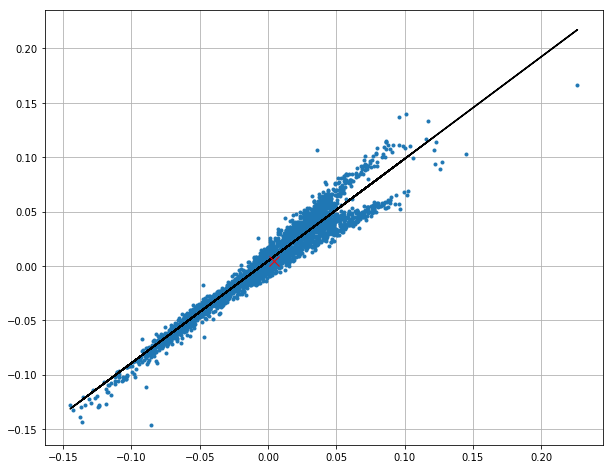

In [18]:
plot(sigA, sigC, '.')
plot(sigA, line(sigA, *popt[0]), 'k')
plot(popt[0][1],popt[0][1], 'rx', markersize=10)
grid()

In [19]:
maskB = ~np.isnan(sigB)
maskC = ~np.isnan(sigC)
mask = maskB * maskC
popt = curve_fit(line, sigB[mask], sigC[mask])
popt[0]

array([ 1.01371108,  0.00298463])

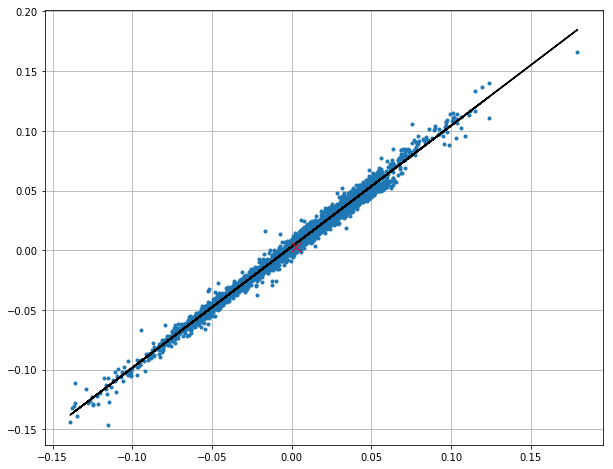

In [20]:
plot(sigB, sigC, '.')
#plot(sigB, line(sigB, 1., 0), 'g')
plot(sigB, line(sigB, *popt[0]), 'k')
plot(popt[0][1],popt[0][1], 'rx', markersize=10)
grid()

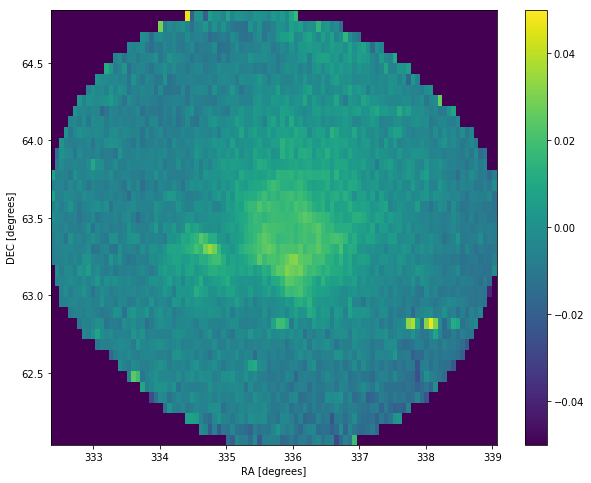

In [21]:
figure()
maskA = ~np.isnan(signalA)
maskB = ~np.isnan(signalB)
mask = maskA * maskB
diffAB = signalA - signalB
diffAB[~mask] = np.nan
pc = pcolormesh(rabins, decbins, diffAB)
clim(-.05, .05)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

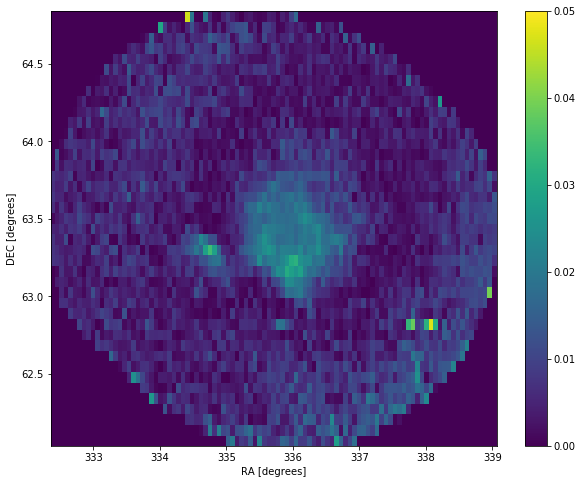

In [22]:
figure()
maskA = ~np.isnan(signalA)
maskB = ~np.isnan(signalB)
mask = maskA * maskB
diffAB = signalA - signalB
diffAB[~mask] = np.nan
pc = pcolormesh(rabins, decbins, np.abs(diffAB))
clim(0, .05)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

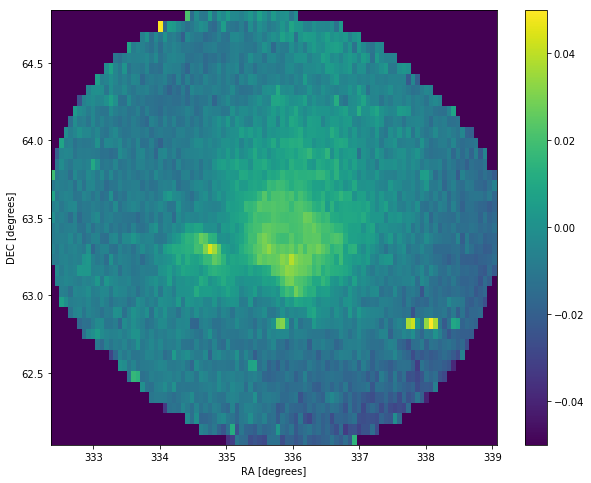

In [23]:
figure()
maskA = ~np.isnan(signalA)
maskC = ~np.isnan(signalC)
mask = maskA * maskC
diffAC = signalA - signalC
diffAC[~mask] = np.nan
pc = pcolormesh(rabins, decbins, diffAC)
clim(-.05, .05)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

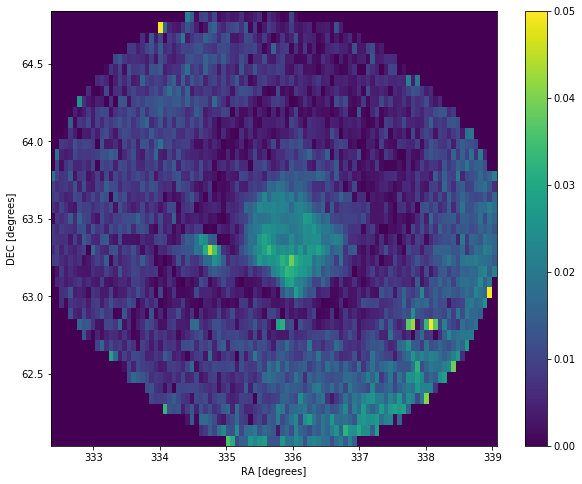

In [24]:
figure()
maskA = ~np.isnan(signalA)
maskC = ~np.isnan(signalC)
mask = maskA * maskC
diffAC = signalA - signalC
diffAC[~mask] = np.nan
pc = pcolormesh(rabins, decbins, np.abs(diffAC))
clim(0, .05)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

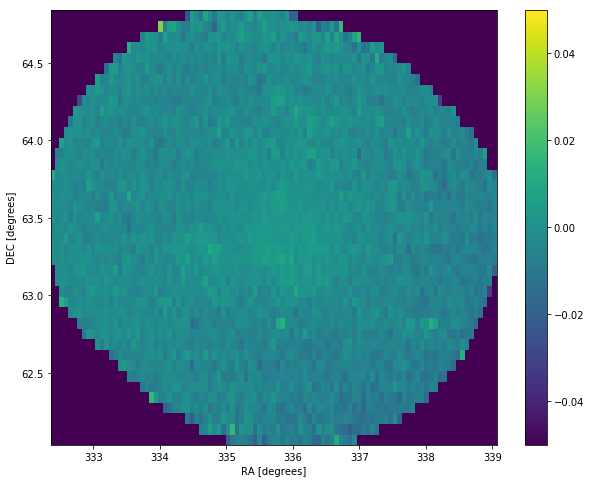

In [25]:
figure()
maskB = ~np.isnan(signalB)
maskC = ~np.isnan(signalC)
mask = maskB * maskC
diffBC = signalB - signalC
diffBC[~mask] = np.nan
pc = pcolormesh(rabins, decbins, diffBC)
clim(-0.05, 0.05)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

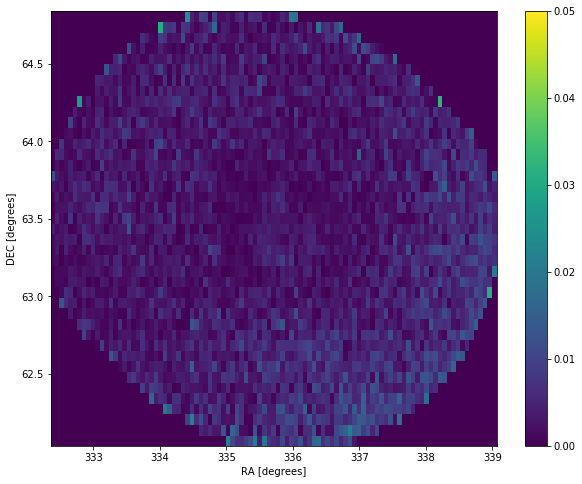

In [26]:
figure()
maskB = ~np.isnan(signalB)
maskC = ~np.isnan(signalC)
mask = maskB * maskC
diffBC = signalB - signalC
diffBC[~mask] = np.nan
pc = pcolormesh(rabins, decbins, np.abs(diffBC))
clim(0, 0.05)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

In [27]:
print np.nanmean(diffAB.reshape(-1, N))
print np.nanmedian(diffAB.reshape(-1, N))

-0.00158720950701
-0.00316583678439


In [28]:
print np.nanmean(diffAC.reshape(-1, N))
print np.nanmedian(diffAC.reshape(-1, N))

-0.00457307127544
-0.00627533165985


In [29]:
print np.nanmean(diffBC.reshape(-1, N))
print np.nanmedian(diffBC.reshape(-1, N))

-0.00298643415429
-0.00290267276093
